In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_url = 'https://drive.google.com/file/d/1vOJZK8xE5vSPgbjeCAMwafhQlGY8j9ev/view?usp=sharing'
data = 'https://drive.google.com/uc?id='+ data_url.split('/')[-2]

raw = pd.read_csv(data)
raw

,Age,AgeGroup,Attrition,BusinessTravel,Department,DistanceFromHome,DistanceGroup,Education,Education (text),EducationField,...,StockOptionLevel,TotalWorkingYears,WorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsAtCompanyRange,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,44,Middle-aged,No,Non-Travel,Research & Development,23,Far,3,Bachelor,Medical,...,1,17,16-20,3,4,3,0-5,2,1,2
1,39,Middle-aged,Yes,Travel_Rarely,Sales,5,Near,3,Bachelor,Technical Degree,...,1,19,16-20,6,4,1,0-5,0,0,0
2,20,Youth,Yes,Travel_Rarely,Research & Development,10,Near,1,Below College,Medical,...,0,1,0-5,5,3,1,0-5,0,1,1
3,18,Youth,No,Non-Travel,Research & Development,5,Near,2,College,Life Sciences,...,0,0,0-5,2,3,0,0-5,0,0,0
4,28,Youth,No,Travel_Rarely,Sales,10,Near,1,Below College,Medical,...,0,1,0-5,5,3,1,0-5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,31,Youth,No,Non-Travel,Research & Development,5,Near,3,Bachelor,Medical,...,0,10,6-10,2,3,9,6-10,4,1,7
1466,40,Middle-aged,No,Non-Travel,Research & Development,8,Near,1,Below College,Medical,...,1,16,16-20,5,3,9,6-10,8,4,8
1467,30,Youth,No,Travel_Rarely,Research & Development,20,Moderate,3,Bachelor,Other,...,1,7,6-10,1,2,6,6-10,2,0,2
1468,27,Youth,No,Travel_Frequently,Sales,20,Moderate,3,Bachelor,Life Sciences,...,0,7,6-10,2,3,7,6-10,7,0,7


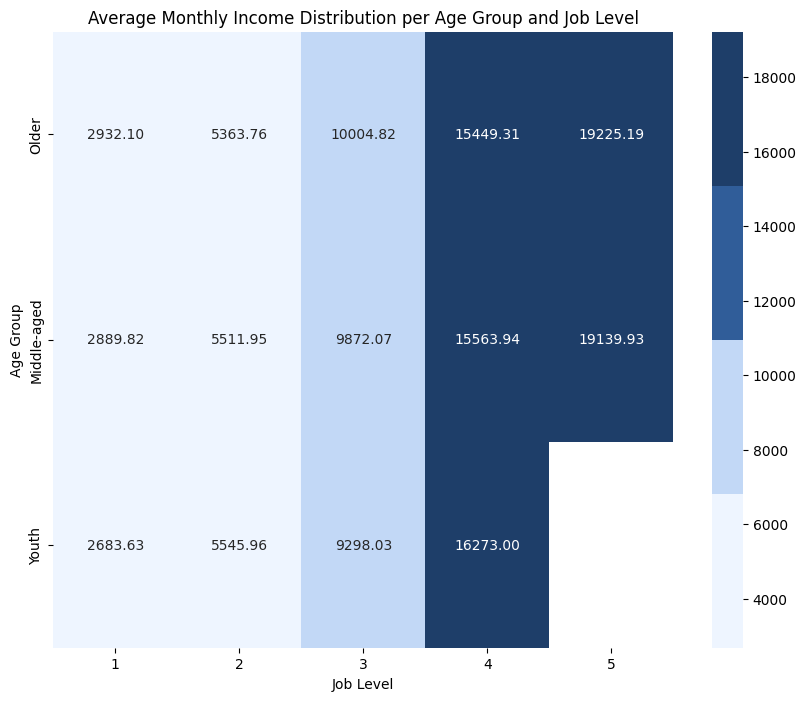

In [ ]:
# Convert 'MonthlyIncome' to a numeric type
raw['MonthlyIncome'] = raw['MonthlyIncome'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert 'AgeGroup' to a categorical type with the specified order
raw['AgeGroup'] = pd.Categorical(raw['AgeGroup'], categories=['Older','Middle-aged','Youth'], ordered=True)

# Create a new dataframe grouping by 'AgeGroup' and 'JobLevel'
grouped_df = raw.groupby(['AgeGroup', 'JobLevel'])['MonthlyIncome'].mean().reset_index()

# Create a pivot table for better visualization
pivot_table = pd.pivot_table(grouped_df, values='MonthlyIncome', index='AgeGroup', columns='JobLevel')

biru = sns.color_palette(['#eef5ffff','#c2d8f6ff','#305d99ff', '#1e3e69'])

# Plotting the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=biru)
plt.title('Average Monthly Income Distribution per Age Group and Job Level')
plt.xlabel('Job Level')
plt.ylabel('Age Group')
plt.show()

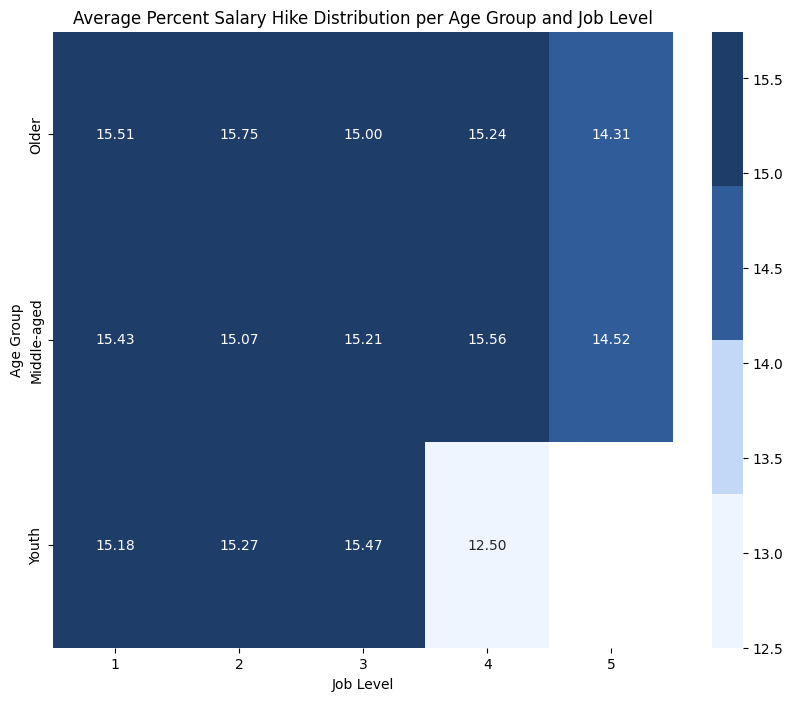

In [ ]:
# Convert 'AgeGroup' to a categorical type with the specified order
raw['AgeGroup'] = pd.Categorical(raw['AgeGroup'], categories=['Older','Middle-aged','Youth'], ordered=True)

# Create a new dataframe grouping by 'AgeGroup' and 'JobLevel'
grouped_df = raw.groupby(['AgeGroup', 'JobLevel'])['PercentSalaryHike'].mean().reset_index()

# Create a pivot table for better visualization
pivot_table = pd.pivot_table(grouped_df, values='PercentSalaryHike', index='AgeGroup', columns='JobLevel')

biru = sns.color_palette(['#eef5ffff','#c2d8f6ff','#305d99ff', '#1e3e69'])

# Plotting the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=biru)
plt.title('Average Percent Salary Hike Distribution per Age Group and Job Level')
plt.xlabel('Job Level')
plt.ylabel('Age Group')
plt.show()

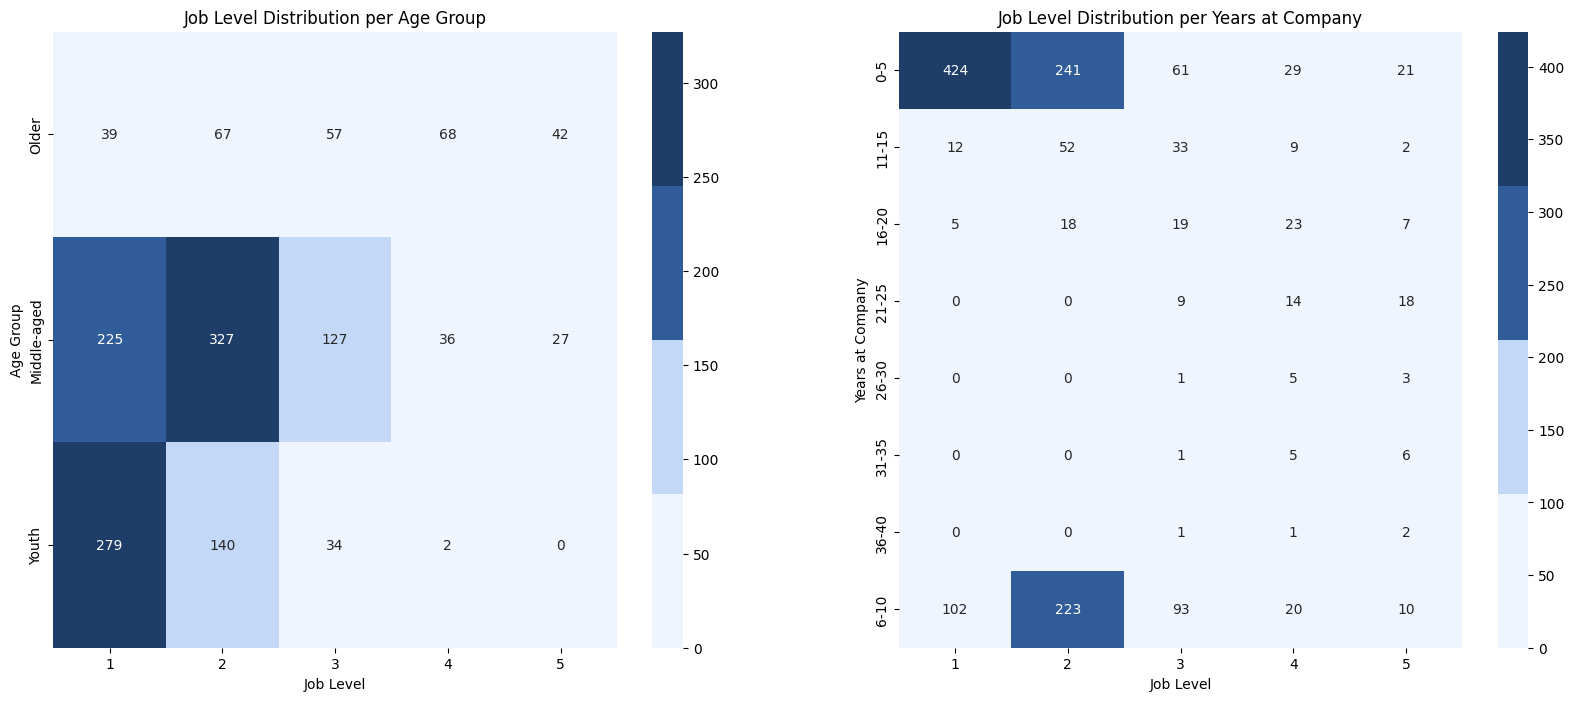

In [ ]:
# Convert 'JobLevel' to an ordered categorical variable with the specified order
raw['JobLevel'] = pd.Categorical(raw['JobLevel'], categories=[1, 2, 3, 4, 5], ordered=True)

# Create new dataframes grouping by 'AgeGroup' and 'JobLevel', and 'YearsAtCompanyRange' and 'JobLevel'
grouped_df_age = raw.groupby(['AgeGroup', 'JobLevel']).size().reset_index(name='Count')
grouped_df_years = raw.groupby(['YearsAtCompanyRange', 'JobLevel']).size().reset_index(name='Count')

# Create pivot tables for better visualization
pivot_table_age = pd.pivot_table(grouped_df_age, values='Count', index='AgeGroup', columns='JobLevel')
pivot_table_years = pd.pivot_table(grouped_df_years, values='Count', index='YearsAtCompanyRange', columns='JobLevel')

# Plotting the pivot tables
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

biru = sns.color_palette(['#eef5ffff','#c2d8f6ff','#305d99ff', '#1e3e69'])

sns.heatmap(pivot_table_age, annot=True, fmt=".0f", cmap=biru, ax=ax[0])
ax[0].set_title('Job Level Distribution per Age Group')
ax[0].set_xlabel('Job Level')
ax[0].set_ylabel('Age Group')

sns.heatmap(pivot_table_years, annot=True, fmt=".0f", cmap=biru, ax=ax[1])
ax[1].set_title('Job Level Distribution per Years at Company')
ax[1].set_xlabel('Job Level')
ax[1].set_ylabel('Years at Company')

plt.show()

In [ ]:
# Filter the data for employees with Attrition = Yes and Job Level = 1
filtered_data = raw[(raw['Attrition'] == 'Yes') & (raw['JobLevel'] == 1)]

# Calculate the average years at the company
average_years = filtered_data['YearsAtCompany'].mean()

print("The average years at the company for employees with Attrition = Yes and Job Level = 1 is {:.2f} years.".format(average_years))

The average years at the company for employees with Attrition = Yes and Job Level = 1 is 3.08 years.


In [ ]:
# Filter the data for employees with Attrition = No and Job Level = 2
filtered_data = raw[(raw['Attrition'] == 'No') & (raw['JobLevel'] == 2)]

# Calculate the average years at the company
average_years = filtered_data['YearsAtCompany'].mean()

# Calculate the average years in current role
average_years_current_role = filtered_data['YearsInCurrentRole'].mean()

# Subtract the average years at the company from the average years in current role
difference = average_years - average_years_current_role

print(difference)

2.321576763485478


<ipython-input-9-a06d696cfab1>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = grouped_data.pivot('JobLevel', 'StockOptionLevel', 'Count')


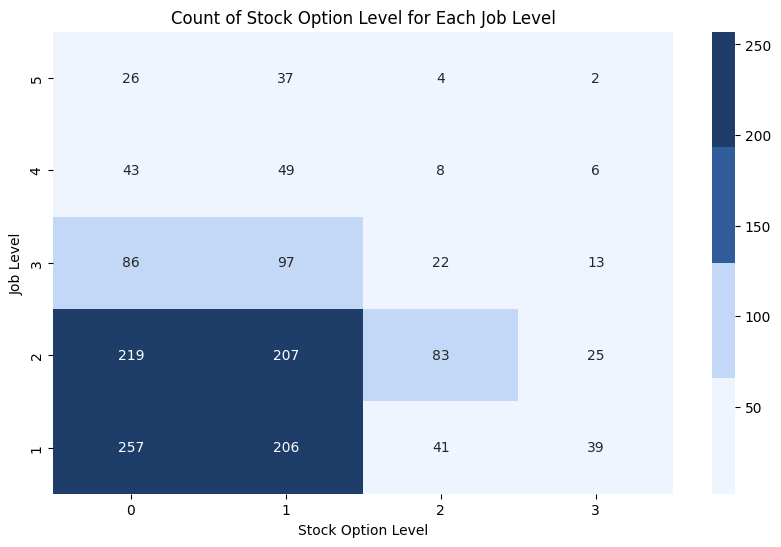

In [ ]:
# Convert 'JobLevel' to an ordered categorical variable
raw['JobLevel'] = pd.Categorical(raw['JobLevel'], categories=[5, 4, 3, 2, 1], ordered=True)

# Group the data by 'JobLevel' and 'StockOptionLevel' and count the number of employees in each group
grouped_data = raw.groupby(['JobLevel', 'StockOptionLevel']).size().reset_index(name='Count')

# Pivot the data to create a matrix that can be used to create a heatmap
pivot_data = grouped_data.pivot('JobLevel', 'StockOptionLevel', 'Count')

biru = sns.color_palette(['#eef5ffff','#c2d8f6ff','#305d99ff', '#1e3e69'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap=biru)
plt.title('Count of Stock Option Level for Each Job Level')
plt.xlabel('Stock Option Level')
plt.ylabel('Job Level')
plt.show()

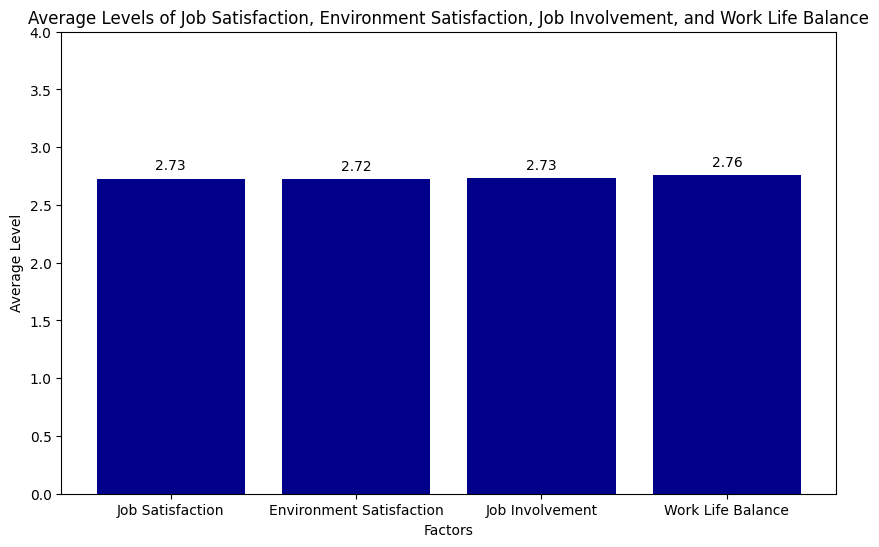

In [ ]:
# Calculate the average of the required columns
avg_job_satisfaction = raw['JobSatisfaction'].mean()
avg_environment_satisfaction = raw['EnvironmentSatisfaction'].mean()
avg_job_involvement = raw['JobInvolvement'].mean()
avg_work_life_balance = raw['WorkLifeBalance'].mean()

# Create a list of the averages
averages = [avg_job_satisfaction, avg_environment_satisfaction, avg_job_involvement, avg_work_life_balance]

# Create a list of the labels
labels = ['Job Satisfaction', 'Environment Satisfaction', 'Job Involvement', 'Work Life Balance']

# Create the gauge bars
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, averages, color='darkblue')

# Add labels and title
plt.xlabel('Factors')
plt.ylabel('Average Level')
plt.title('Average Levels of Job Satisfaction, Environment Satisfaction, Job Involvement, and Work Life Balance')

# Set the y-axis limits to show the full scale
plt.ylim(0, 4)

# Add the value of each bar on top of it
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()

<ipython-input-17-5744890274fd>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = grouped_data.pivot('AgeGroup', 'Attrition', 'Percentage')


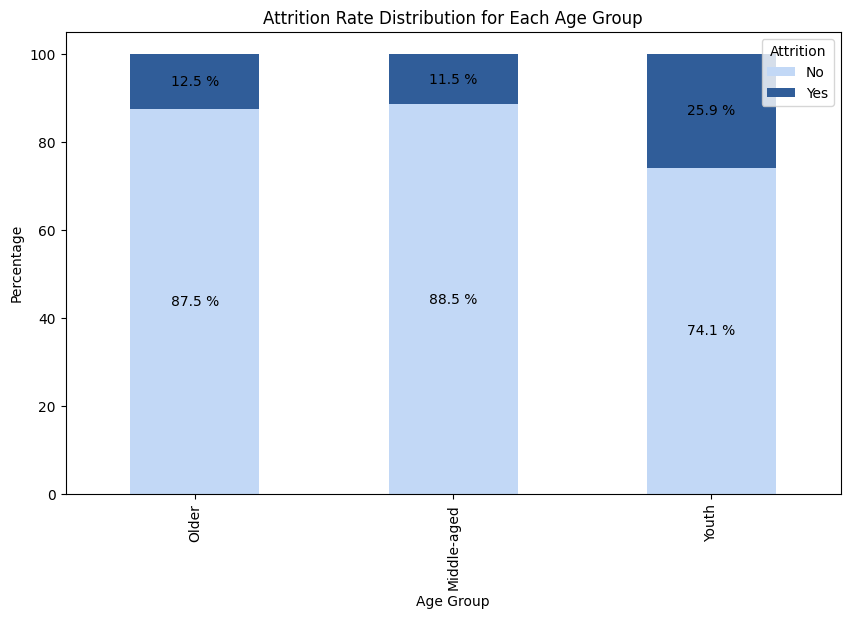

In [ ]:
# Group the data by age group and attrition value and get the count of each group
grouped_data = raw.groupby(['AgeGroup', 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each age group
total_count = grouped_data.groupby('AgeGroup')['Count'].transform('sum')

# Calculate the percentage share of each attrition value within each age group
grouped_data['Percentage'] = grouped_data['Count'] / total_count * 100

# Pivot the data to create a matrix that can be used to create a bar chart
pivot_data = grouped_data.pivot('AgeGroup', 'Attrition', 'Percentage')

# Create the topped bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#c2d8f6ff','#305d99ff'])

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Attrition Rate Distribution for Each Age Group')

# Add the percentage value in the bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f} %'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

# Show the plot
plt.show()

<ipython-input-18-711468c604d7>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = grouped_data.pivot('JobLevel', 'Attrition', 'Percentage')


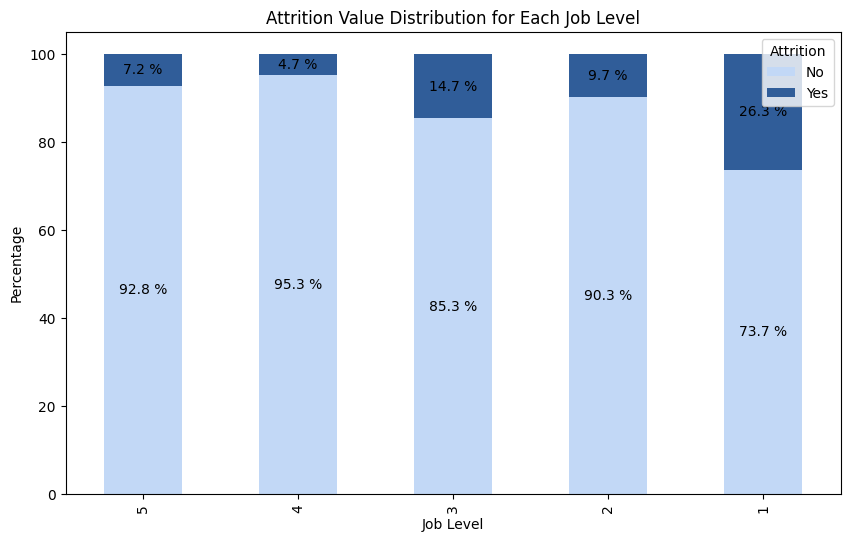

In [ ]:
# Group the data by job level and attrition value and get the count of each group
grouped_data = raw.groupby(['JobLevel', 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each job level
total_count = grouped_data.groupby('JobLevel')['Count'].transform('sum')

# Calculate the percentage share of each attrition value within each job level
grouped_data['Percentage'] = grouped_data['Count'] / total_count * 100

# Pivot the data to create a matrix that can be used to create a bar chart
pivot_data = grouped_data.pivot('JobLevel', 'Attrition', 'Percentage')

# Create the topped bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#c2d8f6ff','#305d99ff'])

# Add labels and title
plt.xlabel('Job Level')
plt.ylabel('Percentage')
plt.title('Attrition Value Distribution for Each Job Level')

# Add the percentage value in the bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f} %'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

# Show the plot
plt.show()

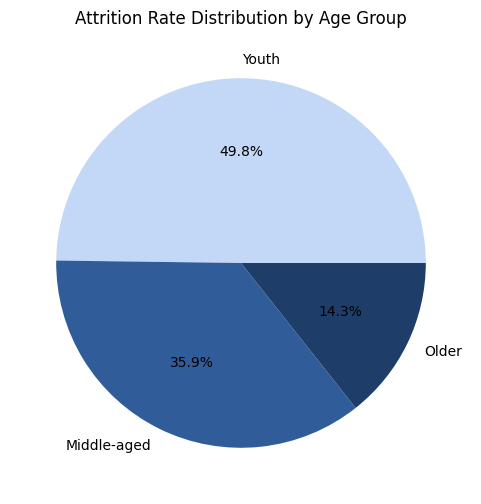

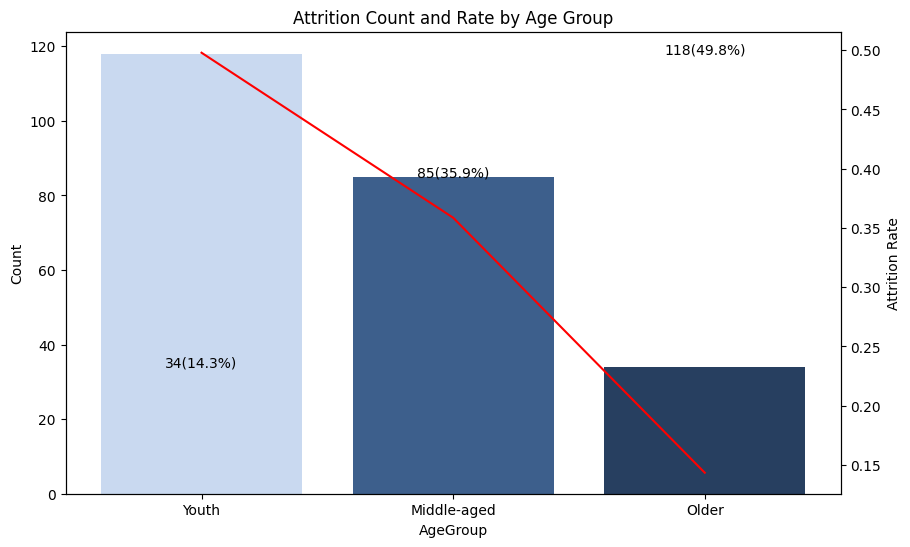

In [ ]:
# Filter the data for attrition 'Yes'
attrition_data = raw[raw['Attrition'] == 'Yes']

# Group the data by 'AgeGroup' and count the number of employees with attrition 'Yes'
grouped_data = attrition_data.groupby('AgeGroup').size().reset_index(name='Count')

# Sort the data by 'AgeGroup'
grouped_data['AgeGroup'] = pd.Categorical(grouped_data['AgeGroup'], categories=['Youth', 'Middle-aged', 'Older'], ordered=True)
grouped_data = grouped_data.sort_values('AgeGroup')

# Calculate the attrition rate for each age group
grouped_data['AttritionRate'] = grouped_data['Count'] / grouped_data['Count'].sum()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(grouped_data['AttritionRate'], labels=grouped_data['AgeGroup'], autopct='%1.1f%%', colors=['#c2d8f6ff', '#305d99ff', '#1e3e69'])
plt.title('Attrition Rate Distribution by Age Group')
plt.show()

# Create the dual axis chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the bar chart
sns.barplot(x='AgeGroup', y='Count', data=grouped_data, ax=ax1, palette=['#c2d8f6ff', '#305d99ff', '#1e3e69'])

# Create the line chart
ax2 = ax1.twinx()
sns.lineplot(x='AgeGroup', y='AttritionRate', data=grouped_data, ax=ax2, color='r')

# Add labels to the bars
for i, row in grouped_data.iterrows():
    ax1.text(i, row['Count'], f"{row['Count']}({row['AttritionRate']*100:.1f}%)", color='black', ha='center')

ax1.set_title('Attrition Count and Rate by Age Group')
ax1.set_ylabel('Count')
ax2.set_ylabel('Attrition Rate')
plt.show()